## Mariana MacDonald

Week 6

## Exercises

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [52]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [53]:
import numpy as np


import thinkstats2
import thinkplot

In [54]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [55]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [56]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [57]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [58]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [59]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

## Exercise starts here

CHAPTER 7 
Exercise 7.1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [60]:
import nsfg

In [61]:
#I created a variable using the live dataframe for age
ages = live.agepreg
ages.head()

0    33.16
1    39.25
2    14.33
3    17.83
4    18.33
Name: agepreg, dtype: float64

In [62]:
#I created a variable using the live dataframe for weights
weights = live.totalwgt_lb
weights.head()

0    8.8125
1    7.8750
2    9.1250
3    7.0000
4    6.1875
Name: totalwgt_lb, dtype: float64

In [63]:
#used the Corr function to find the correlation between age and weight
Corr(ages, weights)

0.06883397035410908

In [64]:
#used the Spearmans rank Corr function to mittigate the effect
#of outliers and skewed distributions.
SpearmanCorr(ages, weights)

0.09461004109658226

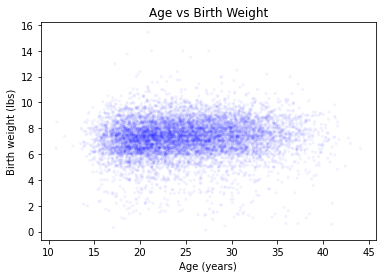

In [65]:
#plotted scatter plot of age versus weight (s is the size of the markers
# and alpha is the transparency

thinkplot.Scatter(ages, weights, alpha=0.05, s=10)
thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     title='Age vs Birth Weight')

In [66]:
#I'll divide the dataset into groups by age 10 min and 48 max, 3 groups.
bins = np.arange(10,48,3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [67]:
#Here are the number of respondents in each group:
for i, group in groups:
    print(i, len(group))

1 4
2 180
3 1169
4 1824
5 1695
6 1505
7 1223
8 830
9 402
10 170
11 34
12 2


In [68]:
#Now we can compute the CDF of weight within each group.
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

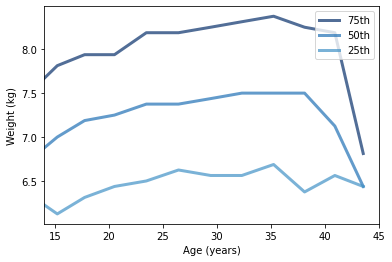

In [69]:
#extract the 25th, 50th, and 75th percentile from each group.
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    
thinkplot.Config(xlabel='Age (years)',
                 ylabel='Weight (kg)',
                 xlim=[14, 45], legend=True)

The scatter plot does not a strong relationship between the mother's age and the weight of the baby. Since Spearman's correlation is about 0.09 and Pearson's about 0.07, this may be indication of a non-linear relationship as the scatter plot shows or that the outliers are influencing on it. 

Spearman's correlation of 0.09 is higher than Pearson's of 0.07 which suggests that Pearson's may have some influence with the outliers in the data.

When I plot the percentiles of age vs baby weight, as the age increases by 5, I can see there is an increase grom 15 to 25 years old in baby's weights but after that, the relationship is not so strong and it's not a linear relationship.

CHAPTER 8
Exercise 8.1

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [70]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [71]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [72]:
import random

def Estimate1(n=7, iters=1000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
Estimate1()

Experiment 1
mean error xbar -0.018761424708682247
mean error median -0.004314995458761993


In [73]:
def Estimate5(n=7, iters=100000):

    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

Experiment 2
RMSE biased 0.516042454609184
RMSE unbiased 0.5785971333645968


When I run the Experiment 1, I got xbar and median very low, close to zero, which is a good indicative that they are unbiased. 

On the Experiment 2 I got the value of biased lower than unbiased, even if I run multiple times.

Exercise 8.2

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

standard error 0.8428983775854112
confidence interval (1.2394769080109573, 3.770988345846102)


0.8428983775854112

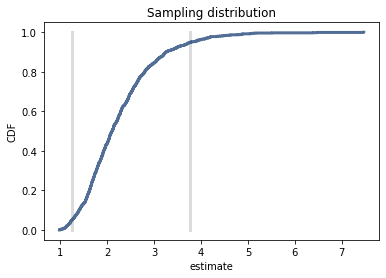

In [108]:
#used the lambda 2, sample size 10 and simulated 1000 times.
#vertline is plotting the confidence interval (the 2 grey lines)


def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

        
#calculating the standard error
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    
#calculating the cdf
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

standard error 0.20221977238534372
confidence interval (1.7185407792225837, 2.383082577318839)


0.20221977238534372

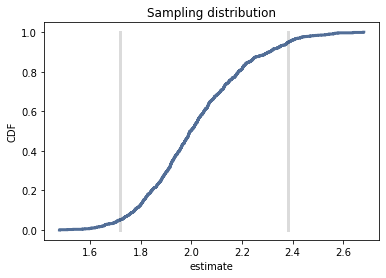

In [109]:
#here I change n from 10 to 100


def SimulateSample(lam=2, n=100, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

        
#calculating the standard error
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    
#calculating the cdf
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

standard error 0.06537440215414633
confidence interval (1.8944398686525754, 2.113051360236155)


0.06537440215414633

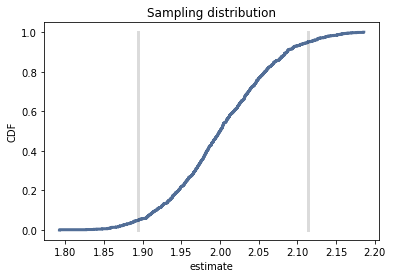

In [110]:
#here I change n from 100 to 1000


def SimulateSample(lam=2, n=1000, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

        
#calculating the standard error
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    
#calculating the cdf
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

In [111]:
# 1) With sample size 10:

#standard error 0.8121382602700157
#confidence interval (1.247049535066752, 3.6490995317252026)

# 2) As sample size increases, standard error and the width of
#    the CI decrease:

# 10      0.8    (1.2, 3.6)
# 100     0.20    (1.7, 2.3)
# 1000    0.06    (1.9, 2.1)

# All three confidence intervals contain the actual value, 2.

In [ ]:
#The numbers can vary a bit everytime I run.